## Python para Finanças - Análise fundamentalista de ativos
Vamos extrair os dados de uma série de ativos da bolsa brasileira e tratar esses dados gerando uma tabela para que possamos analisar os dados com Python.

Para isso, vamos utilizar a biblioteca fundamentus que extrai os dados do site Fundamentus. Este site disponibiliza informações financeiras e fundamentalistas das empresas com ações listadas na Bovespa.

In [13]:
# bibliotecas usadas
!pip install fundamentus==0.2.0
import fundamentus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lendo a carteira de ativos

In [17]:
# Definindo a carteira de ações
carteira = ['ABEV3', 'AZZA3', 'AZUL4', 'B3SA3', 'BRKM5', 'CIEL3', 'CMIG4', 'CPFE3', 'CPLE6', 'CRFB3',
            'CSAN3', 'CVCB3', 'CYRE3', 'EGIE3', 'ELET6', 'EMBR3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4',
            'HAPV3', 'HYPE3', 'JBSS3', 'KLBN11', 'MGLU3', 'MRVE3', 'PCAR3', 'PETR4', 'PRIO3', 'RECV3',
            'RENT3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'USIM5', 'VALE3', 'VBBR3', 'VIVT3', 'WEGE3']

In [18]:


# Criando um df com algumas infos da carteira
ind = pd.concat([fundamentus.get_papel(papel)[['Setor','Valor_de_mercado', 'Nro_Acoes', 'Receita_Liquida_12m',
                                               'Receita_Liquida_3m','Lucro_Liquido_12m', 'Lucro_Liquido_3m']] for papel in carteira])
ind.tail(3)

2025-01-06 21:58:52,842 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
m:\apps no sd\Python\Lib\site-packages\fundamentus\detalhes.py:232: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_html = pd.read_html(content.text, decimal=",", thousands='.')
2025-01-06 21:58:53,254 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
m:\apps no sd\Python\Lib\site-packages\fundamentus\detalhes.py:232: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_html = pd.read_html(content.text, decimal=",", thousands='.')
2025-01-06 21:58:53,517 [detalhes.get_papel] INFO: detalhes: call: get..._papel()
m:\apps no sd\Python\Lib\site-packages\fundamentus\detalhes.py:232: FutureWarning: Passing literal html to 'read_html' is deprecated and w

,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m
VBBR3,"Petróleo, Gás e Biocombustíveis",19750400000,1119000000,171642000000,46271000000,9154000000,4201000000
VIVT3,Telecomunicações,77846900000,1630640000,54798400000,14039100000,5385550000,1667440000
WEGE3,Máquinas e Equipamentos,220233000000,4197320000,35725900000,9856930000,6093230000,1578680000



É importante trazer os tickers dos ativos para uma coluna para que possamos mais a frente combinar os dados que extraímos com outros dados e múltiplos dos ativos. Vamos fazer essa etapa renomeando a coluna e também alterando os tipos dos dados numéricos para o formato correto, visto que a função `get_papel()` importa todos os dados como texto.

In [19]:
# Passando o ticker para uma coluna
ind = ind.reset_index()
ind.rename(columns={"index":"Ativo"}, inplace=True)

# Alterando colunas object para numeric
colunas = ['Valor_de_mercado', 'Nro_Acoes', 'Receita_Liquida_12m', 'Receita_Liquida_3m', 'Lucro_Liquido_12m', 'Lucro_Liquido_3m']
ind[colunas] = ind[colunas].apply(pd.to_numeric, errors='coerce', axis=1)
ind.tail()

,Ativo,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m
35,USIM5,Siderurgia e Metalurgia,6378170000,1253080000,26171000000,6817100000,912044000,163529000
36,VALE3,Mineração,238570000000,4539010000,211109000000,52978000000,48251000000,13386000000
37,VBBR3,"Petróleo, Gás e Biocombustíveis",19750400000,1119000000,171642000000,46271000000,9154000000,4201000000
38,VIVT3,Telecomunicações,77846900000,1630640000,54798400000,14039100000,5385550000,1667440000
39,WEGE3,Máquinas e Equipamentos,220233000000,4197320000,35725900000,9856930000,6093230000,1578680000


### Adicionando mais dados à carteira
Pronto! Conseguimos ajustar a primeira parte dos dados. Agora vamos extrair os outros dados que vão agregar ainda mais em nossas análises. Para isso vamos criar um novo DataFrame agora usando a função get_resultado_raw() e extraindo apenas os dados dos ativos que definimos na carteira.

Além disso, vamos renomear a coluna do papel para Ativo.

In [20]:
# Criando um novo df com alguns indicadores da carteira
ind_2 = fundamentus.get_resultado_raw().reset_index()
ind_2 = ind_2.query("papel in @carteira")

ind_2.rename(columns={'papel': 'Ativo'}, inplace=True)
ind_2.head()

m:\apps no sd\Python\Lib\site-packages\fundamentus\resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


Multiples,Ativo,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
3,ABEV3,11.29,12.76,1.81,2.159,0.0591,1.208,25.42,10.12,-31.05,...,6.73,0.2133,0.1741,1.20,0.1639,0.1421,501063000.0,9.814040e+10,0.03,0.1004
74,AZUL4,4.30,-0.32,-0.06,0.079,0.0000,0.064,-0.11,0.48,-0.03,...,5.52,0.1658,-0.2516,0.27,0.1687,0.1825,96657000.0,-2.603600e+10,-1.17,0.3140
75,AZZA3,30.55,11.89,0.80,0.986,0.0283,0.423,2.17,11.04,-15.22,...,9.11,0.0893,0.0824,1.78,0.0462,0.0675,80953400.0,7.865410e+09,0.31,0.4431
76,B3SA3,10.38,13.06,2.94,5.417,0.0361,1.223,7.39,9.72,-5.38,...,8.30,0.5574,0.4149,1.86,0.1876,0.2253,663003000.0,1.914520e+10,0.67,0.0451
166,BRKM5,11.87,-1.22,-378.52,0.126,0.0000,0.102,1.26,9.80,-0.16,...,6.47,0.0129,-0.1121,1.28,0.0154,309.4260,56599100.0,-2.499990e+07,-1790.12,0.0447


Agora, vamos concatenar as duas tabelas em uma só usando como chave a coluna Ativo.

Além disso, vamos criar mais 2 indicadores LPA (Lucro por Ação) e VPA (Valor Patrimonial por Ação) que são indicadores importantes para uma série de análises.

In [21]:
# Concatenando os dfs em um só com as infos e indicadores
indicadores = pd.merge(ind, ind_2, on="Ativo")

# Criando uma coluna para LPA (Lucro por Ação) e VPA (Valor Patrimonial por ação)
# para calcular a fórmula de Graham  Valor intrínseco de uma ação (VI = √22,5 x LPA x VPA)
indicadores["LPA"] = (indicadores["Lucro_Liquido_12m"] / indicadores["Nro_Acoes"]).round(2)
indicadores["VPA"] = (indicadores["Patrim. Líq"] / indicadores["Nro_Acoes"]).round(2)
indicadores.head()

,Ativo,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m,Cotação,P/L,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,LPA,VPA
0,ABEV3,Bebidas,177904000000,15757700000,82406500000,22096700000,13944500000,3460270000,11.29,12.76,...,0.1741,1.20,0.1639,0.1421,501063000.0,9.814040e+10,0.03,0.1004,0.88,6.23
1,AZZA3,Comércio,6308270000,206490000,6400540000,2546620000,530751000,206463000,30.55,11.89,...,0.0824,1.78,0.0462,0.0675,80953400.0,7.865410e+09,0.31,0.4431,2.57,38.09
2,AZUL4,Transporte,1496990000,348137000,18886200000,5129600000,-4752020000,121186000,4.30,-0.32,...,-0.2516,0.27,0.1687,0.1825,96657000.0,-2.603600e+10,-1.17,0.3140,-13.65,-74.79
3,B3SA3,Serviços Financeiros Diversos,56327100000,5426500000,10398500000,2711380000,4313670000,1204490000,10.38,13.06,...,0.4149,1.86,0.1876,0.2253,663003000.0,1.914520e+10,0.67,0.0451,0.79,3.53
4,BRKM5,Químicos,9462860000,797208000,74950300000,21264000000,-7735630000,-1081000000,11.87,-1.22,...,-0.1121,1.28,0.0154,309.4260,56599100.0,-2.499990e+07,-1790.12,0.0447,-9.70,-0.03


In [25]:
indicadores.loc[indicadores['Ativo'] == 'BRKM5', 'ROE'] = indicadores.loc[indicadores['Ativo'] == 'BRKM5', 'ROE'] / 1000

### Visualizando os dados da carteira
Agora que já possuímos a nossa carteira consolidada com alguns dados fundamentalistas, vamos realizar alguns testes em nossa tabela, utilizando filtros, agrupando e visualizando os dados.

Vamos observar quais os setores e quantos ativos de cada possuímos?

In [26]:
indicadores["Setor"].value_counts()

Setor
Energia Elétrica                            6
Petróleo, Gás e Biocombustíveis             5
Construção Civil                            3
Comércio e Distribuição                     3
Comércio                                    3
Siderurgia e Metalurgia                     3
Serviços Financeiros Diversos               2
Telecomunicações                            2
Madeira e Papel                             2
Serv.Méd.Hospit. Análises e Diagnósticos    2
Alimentos Processados                       1
Mineração                                   1
Diversos                                    1
Bebidas                                     1
Material de Transporte                      1
Viagens e Lazer                             1
Químicos                                    1
Transporte                                  1
Máquinas e Equipamentos                     1
Name: count, dtype: int64

Conseguimos observar que a maioria dos ativos são do Setor Elétrico. Que tal a gente agrupar esses dados e observar quais são esses ativos ordenando pelo Valor de Mercado?

In [27]:
setor_eletrico = indicadores.query("Setor == 'Energia Elétrica'").sort_values(by="Valor_de_mercado", ascending=False)
setor_eletrico
     

,Ativo,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m,Cotação,P/L,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,LPA,VPA
14,ELET6,Energia Elétrica,86954600000,2307100000,38078600000,11042900000,10155700000,7195280000,37.69,8.56,...,0.2669,2.06,0.0389,0.0838,74037400.0,1.212520e+11,0.58,0.0478,4.40,52.56
7,CPFE3,Energia Elétrica,36388200000,1152250000,41222200000,10854500000,5487960000,1264960000,31.58,6.63,...,0.1338,1.11,0.1652,0.2687,56103600.0,2.042310e+10,1.40,0.0747,4.76,17.72
6,CMIG4,Energia Elétrica,31050300000,2861780000,38599400000,10148900000,8004660000,3279630000,10.85,3.88,...,0.2074,1.04,0.1393,0.2853,181378000.0,2.806000e+10,0.50,0.1101,2.80,9.81
13,EGIE3,Energia Elétrica,28777800000,815928000,10658700000,2536850000,4158300000,655047000,35.27,6.92,...,0.3904,1.02,0.1255,0.3851,59171200.0,1.079740e+10,2.13,-0.0305,5.10,13.23
8,CPLE6,Energia Elétrica,27113700000,2982810000,21677000000,5735610000,3102150000,1219660000,9.09,8.74,...,0.1461,1.45,0.0882,0.1217,194670000.0,2.549340e+10,0.64,0.0390,1.04,8.55
33,TAEE11,Energia Elétrica,11258200000,1033500000,3937650000,990989000,1432820000,409282000,32.68,7.86,...,0.3639,1.42,0.1166,0.2059,78318200.0,6.960480e+09,1.44,0.0249,1.39,6.73



### Filtrando por valor de um indicador
Conseguimos filtrar os dados utilizando uma variável categórica. Vamos agora fazer esse processo para um indicador (variável numérica).

In [28]:
maiores_ROE = indicadores[["Ativo","ROE"]].sort_values(by="ROE", ascending=False)
maiores_ROE["ROE"] = maiores_ROE["ROE"] * 100
maiores_ROE = maiores_ROE.query("ROE > 20")
maiores_ROE

,Ativo,ROE
37,VBBR3,44.8200
13,EGIE3,38.5100
4,BRKM5,30.9426
39,WEGE3,30.8900
6,CMIG4,28.5300
28,PRIO3,26.9400
7,CPFE3,26.8700
36,VALE3,23.1400
3,B3SA3,22.5300
27,PETR4,21.5100



### Filtrando por mais indicadores e adicionando uma coluna calculada
Vamos subir mais um degrau na filtragem de dados. Agora vamos filtrar não apenas por uma, mas por mais variáveis, cada uma com um valor específico para ela.

Para isso, vamos criar uma tabela que recebe apenas os ativos que possuem P/L (Preço sobre Lucro) menor ou igual a 15 e P/VP (Preço pelo Valor Patrimonial) menor ou igual a 1.5. E, além disso, vamos gerar uma coluna chamada Valor Intrínseco que é dada pela seguinte fórmula:

In [29]:
carteira = indicadores[["Ativo", "P/L", "P/VP", "VPA", "LPA"]]
carteira  = carteira.query("`P/L` <= 15 and `P/VP` <= 1.5 and VPA > 0 and LPA > 0").reset_index(drop=True)
carteira["Valor_Intrínseco"] = np.sqrt(22.5 * carteira["LPA"] * carteira["VPA"]).round(2)
carteira

,Ativo,P/L,P/VP,VPA,LPA,Valor_Intrínseco
0,AZZA3,11.89,0.80,38.09,2.57,46.93
1,CMIG4,3.88,1.11,9.81,2.80,24.86
2,CPLE6,8.74,1.06,8.55,1.04,14.14
3,CSAN3,6.92,0.78,10.67,1.20,16.97
4,CYRE3,4.59,0.72,23.29,3.65,43.73
5,ELET6,8.56,0.72,52.56,4.40,72.13
6,EZTC3,6.70,0.49,22.12,1.63,28.48
7,FLRY3,10.95,1.26,9.76,1.12,15.68
8,GGBR4,7.76,0.68,26.60,2.32,37.26
9,GOAU4,6.21,0.54,18.63,1.62,26.06



### Visualizando dados graficamente
Para finalizar, vamos gerar um gráfico simples com os 10 maiores DY da tabela que geramos indicadores.

Para isso, vamos filtrar esses dados, gerando uma nova tabela e representá-los por meio de um gráfico de barras

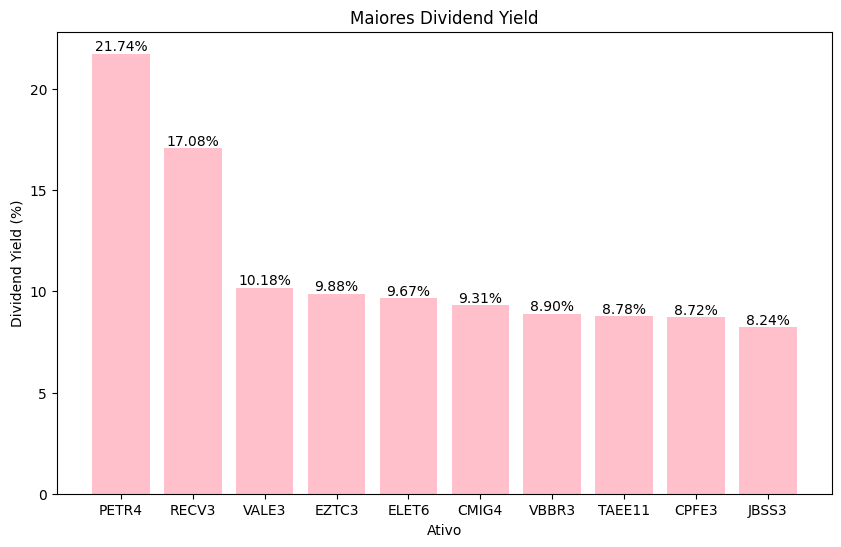

In [30]:
maiores_DY = indicadores[["Ativo","Div.Yield"]].sort_values(by="Div.Yield", ascending=False).head(10)
maiores_DY["Div.Yield"] = maiores_DY["Div.Yield"] * 100

plt.figure(figsize=(10, 6))
plt.bar(maiores_DY["Ativo"], maiores_DY["Div.Yield"], color='pink')
plt.title("Maiores Dividend Yield")
plt.xlabel("Ativo")
plt.ylabel("Dividend Yield (%)")

for i, v in enumerate(maiores_DY["Div.Yield"]):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()